In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("student_performance.csv")

In [ ]:
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,59.8865,F,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,81.9170,B,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,67.7170,D,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.6535,F,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,71.4030,C,13.3,Yes,No,Master's,Medium,6,4.5


In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

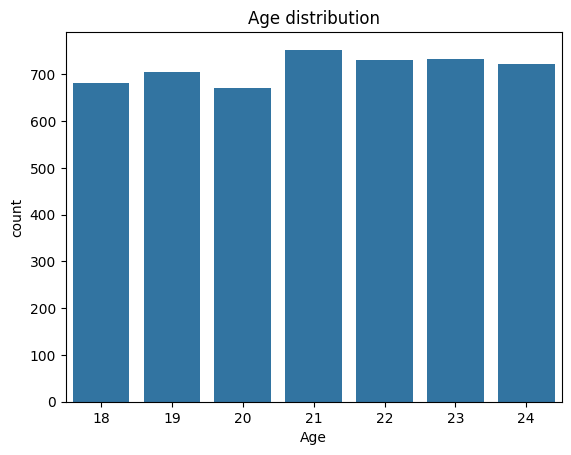

In [ ]:
sns.countplot(x="Age", data=df)
plt.title("Age distribution")
plt.show()

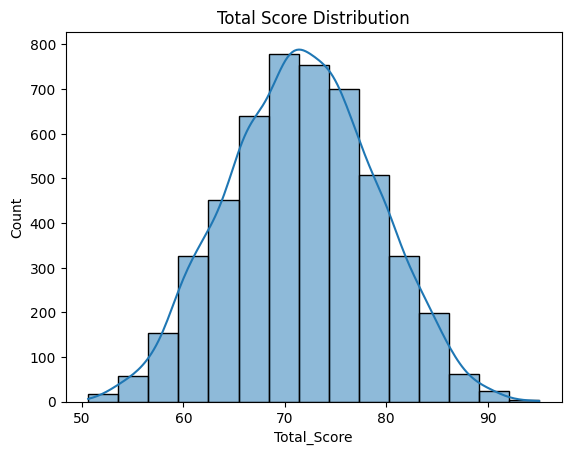

In [ ]:
# Total Scores distribution
sns.histplot(df['Total_Score'], bins=15, kde=True)
plt.title("Total Score Distribution")
plt.show()

In [ ]:
# select features for clustering
features = ["Study_Hours_per_Week", "Total_Score", "Attendance (%)", "Stress_Level (1-10)"]
X = df[features]

In [ ]:
# 2. Handle missing values (impute with mean)
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

In [ ]:
# 3. Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [ ]:
# 4. PCA (reduce to 2D for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# 5. Try KMeans clustering
silhouette_scores = {}
for k in range(2, 8):  # try 2 to 7 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores[k] = score

best_k = max(silhouette_scores, key=silhouette_scores.get)

In [ ]:
# 6. Final KMeans with best k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_pca)


In [ ]:
# 7. Visualization (Plotly)
fig = px.scatter(
    x=X_pca[:,0], y=X_pca[:,1],
    color=df["Cluster"].astype(str),
    hover_data=[df.index, df["Attendance (%)"], df["Total_Score"]],
    title=f"Student Performance Groups (k={best_k})"
)
fig.show()

In [ ]:
# Convert the silhouette_scores dict to DataFrame
silhouette_df = pd.DataFrame(list(silhouette_scores.items()),
                             columns=["Number of Clusters (k)", "Silhouette Score"])

# Print as table
print(silhouette_df.to_string(index=False))

 Number of Clusters (k)  Silhouette Score
                      2          0.315979
                      3          0.339017
                      4          0.323037
                      5          0.320274
                      6          0.337236
                      7          0.334287
